In [1]:
import random
random.seed(122)

import csv
import pandas as pd
import numpy as np
import xgboost as xgb
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
from sklearn.model_selection import train_test_split

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import DMatrix
from matplotlib import pyplot

with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
      
   
start = time.time()  

features=features.rename(columns = {'interact':'label'})

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

features = features[features.columns.drop(list(features.filter(regex='Host')))]

#shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)

# Labels are the values we want to predict
labels = np.array(features['label'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('label', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30, random_state = 42)
end = time.time()

print(round(end - start,2)," seconds elapsed")
print(feature_list)


(0.73, ' seconds elapsed')
['Pathogen_Ala', 'Pathogen_Arg', 'Pathogen_Asn', 'Pathogen_Asp', 'Pathogen_Cys', 'Pathogen_Gln', 'Pathogen_Glu', 'Pathogen_Gly', 'Pathogen_His', 'Pathogen_Ile', 'Pathogen_Leu', 'Pathogen_Lys', 'Pathogen_Met', 'Pathogen_Phe', 'Pathogen_Pro', 'Pathogen_Ser', 'Pathogen_Thr', 'Pathogen_Trp', 'Pathogen_Tyr', 'Pathogen_Val', 'GO_Similarity_Score']


(7.58, ' seconds elapsed')
[[5878 2038]
 [1747 6448]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      7916
           1       0.76      0.79      0.77      8195

   micro avg       0.77      0.77      0.77     16111
   macro avg       0.77      0.76      0.76     16111
weighted avg       0.77      0.77      0.76     16111

('Accuracy:', 0.7650673452920365)


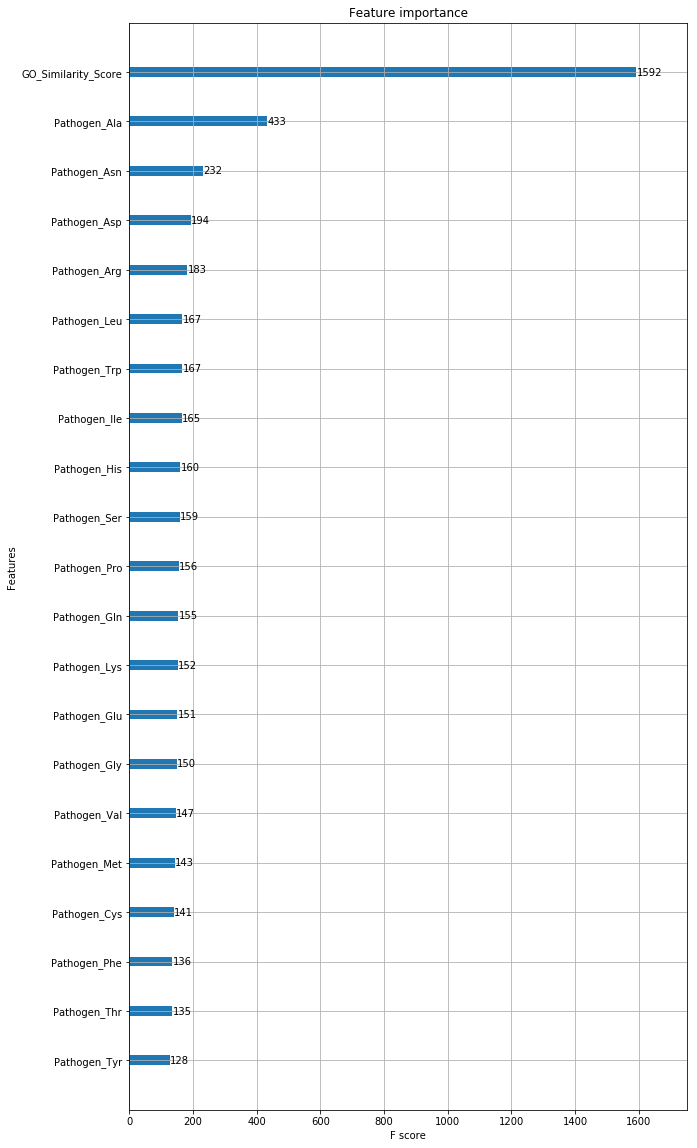

In [2]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 100
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

(35.07, ' seconds elapsed')
[[   0    0    0]
 [   2 5924 1990]
 [   0 1926 6269]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.75      0.75      0.75      7916
         1.0       0.76      0.76      0.76      8195

   micro avg       0.76      0.76      0.76     16111
   macro avg       0.50      0.50      0.50     16111
weighted avg       0.76      0.76      0.76     16111

('Accuracy:', 0.7568121159456273)


/home/bwjoyce/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


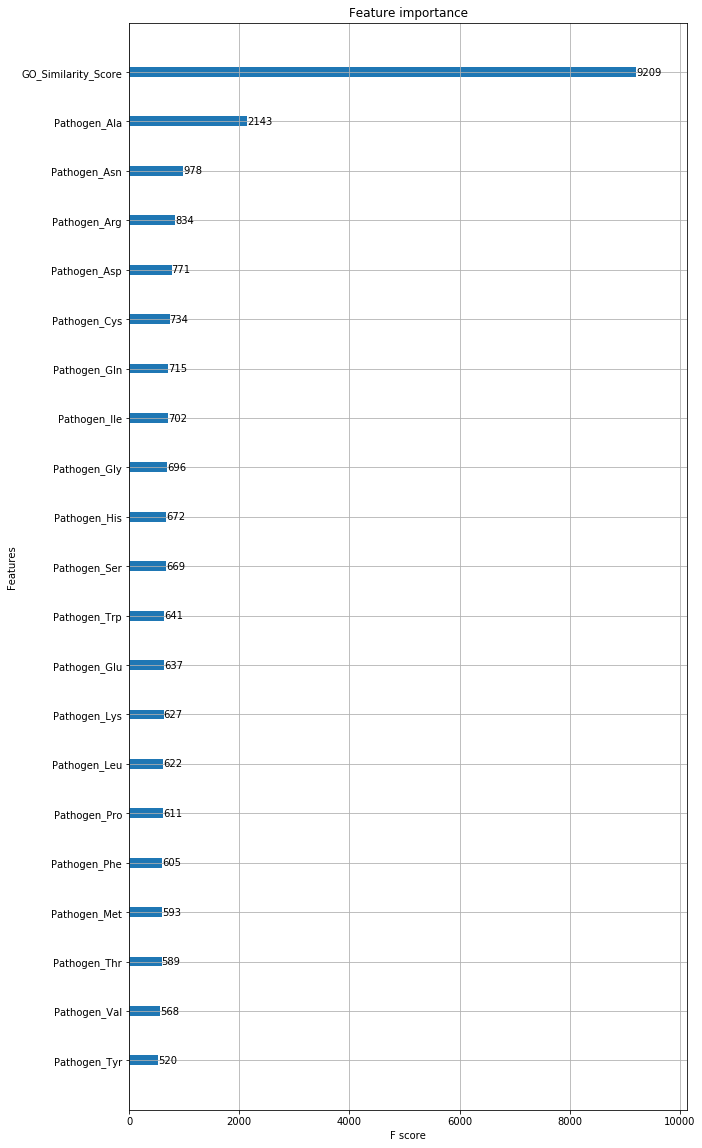

In [3]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 500
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

In [5]:
#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python
start = time.time() 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate model with 1000 decision trees  
#-  1 tree had Accuracy:    81.01%. and took 1 sec.
# - 10 trees had Accuracy:  89.27%. and took 10 sec.
# - 100 trees had Accuracy: 90.87%. and took 102 sec.
# - 500 trees had Accuracy: 90.76%. and took 483 sec.
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

#calcualte the accuracy
accuracy = sum(predictions.round() == test_labels)/test_labels.size
# Print out the Accuracy
print('Accuracy:', 100*round(accuracy, 4), '%.')

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))





('Accuracy:', 0.0, '%.')
(41.92, ' seconds elapsed')
[[5915 2001]
 [1927 6268]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      7916
           1       0.76      0.76      0.76      8195

   micro avg       0.76      0.76      0.76     16111
   macro avg       0.76      0.76      0.76     16111
weighted avg       0.76      0.76      0.76     16111

('Accuracy:', 0.7561914220098069)
Variable: GO_Similarity_Score  Importance: 0.42
Variable: Pathogen_Ala         Importance: 0.04
Variable: Pathogen_Asn         Importance: 0.04
Variable: Pathogen_Gly         Importance: 0.04
Variable: Pathogen_Leu         Importance: 0.04
Variable: Pathogen_Ser         Importance: 0.04
Variable: Pathogen_Gln         Importance: 0.03
Variable: Pathogen_Phe         Importance: 0.03
Variable: Pathogen_Pro         Importance: 0.03
Variable: Pathogen_Thr         Importance: 0.03
Variable: Pathogen_Trp         Importance: 0.03
Variable: Pathogen_Tyr         

In [7]:
#omitted GO_Similarity_Score and all host columns
#re-import data without columns that have less than 0.02 from the above feature importance print out

#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python

with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
      
   
start = time.time()  

features=features.rename(columns = {'interact':'label'})

#remove columns 
features = features[features.columns.drop(list(features.filter(regex='Host|GO_S')))]

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

#shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)

# Labels are the values we want to predict
labels = np.array(features['label'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('label', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

start = time.time() 




# Instantiate model with 1000 decision trees  
#-  1 tree had Accuracy:    81.91%. and took 1 sec.
# - 10 trees had Accuracy:  88.99%. and took 13 sec.
# - 100 trees had Accuracy: 91.01%. and took 120 sec.
# - 500 trees had Accuracy: 90.76%. and took 483 sec.
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

end = time.time()

print(str(round(end - start,2))+" seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:"+str(metrics.accuracy_score(test_labels,predictions.round())))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 

for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))






52.03 seconds elapsed
[[5915 2001]
 [1927 6268]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      7916
           1       0.76      0.76      0.76      8195

   micro avg       0.76      0.76      0.76     16111
   macro avg       0.76      0.76      0.76     16111
weighted avg       0.76      0.76      0.76     16111

Accuracy:0.7561914220098069
Variable: Pathogen_Ala         Importance: 0.04
Variable: Pathogen_Asn         Importance: 0.04
Variable: Pathogen_Gly         Importance: 0.04
Variable: Pathogen_Leu         Importance: 0.04
Variable: Pathogen_Ser         Importance: 0.04
Variable: Pathogen_Gln         Importance: 0.03
Variable: Pathogen_Phe         Importance: 0.03
Variable: Pathogen_Pro         Importance: 0.03
Variable: Pathogen_Thr         Importance: 0.03
Variable: Pathogen_Trp         Importance: 0.03
Variable: Pathogen_Tyr         Importance: 0.03
Variable: Pathogen_Val         Importance: 0.03
Variable: Pathogen_A

(33.08, ' seconds elapsed')
[[4280 3727]
 [2373 5731]]
              precision    recall  f1-score   support

           0       0.64      0.53      0.58      8007
           1       0.61      0.71      0.65      8104

   micro avg       0.62      0.62      0.62     16111
   macro avg       0.62      0.62      0.62     16111
weighted avg       0.62      0.62      0.62     16111

('Accuracy:', 0.6213766991496493)


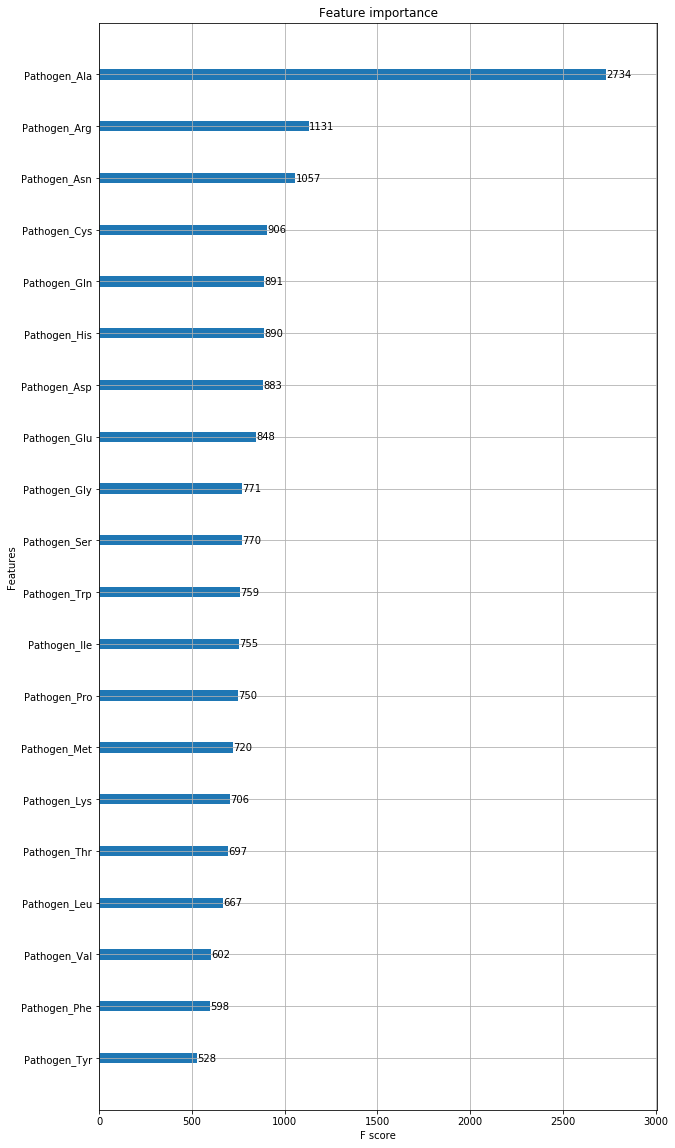

In [10]:
#omitted GO_Similarity_Score and all host columns

#forgot this in above cell
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30, random_state = 42)


#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 500
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()